
__<font size="5">Blackwell Electronics Customer Demographics and Purchasing behavior</font>__

***Customer Bying Patterns and Demographics***

**Author:** *Alidu Okpanachi*




In [1]:
#This cell contains the code to hide the code with a button to hide and show the code when you export the Notebook to html
#The option to export with automatic table of contents is File > Export Notebook As > Export Notebook to Html_toc

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
from IPython.display import HTML, display

# JavaScript code to hide code cells by default when exporting to HTML
hide_code_js = """
<script>
function hideCodeCells() {
    if (typeof codeCells === 'undefined') {
        codeCells = document.querySelectorAll('.input');
    }
    codeCells.forEach(function(cell) {
        cell.style.display = 'none';
    });
}
hideCodeCells();
</script>
"""

# JavaScript code to toggle code cells visibility
toggle_code_js = """
<script>
function toggleCodeCells() {
    if (typeof codeCells === 'undefined') {
        codeCells = document.querySelectorAll('.input');
    }
    codeCells.forEach(function(cell) {
        cell.style.display = (cell.style.display === 'none') ? 'block' : 'none';
    });
}
</script>
<button onclick="toggleCodeCells()">Toggle code</button>
"""

# Display JavaScript code to hide code cells by default and toggle code cells visibility
display(HTML(hide_code_js))
display(HTML(toggle_code_js))

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
np.random.seed(42)

__<font size="6">Table of Contents</font>__


* [Introduction](#Introduction)
* [Data Description](#Description)
* [Data Preparation](#Preparation)
    * [Duplicates](#Duplicates)
    * [Missing Values](#Duplicates)
    * [Outliers](#Duplicates)
    * [Data Transformation](#Transformation)
    * [Descretization](#descretization)
    * [Feature Engineering](#Feature)
    
    
* [Exploratory Data Analysis](#EDA)
    * [Univariate Analysis](#Univar)
    * [Bivariate analysis](#Bivar)
    * [Multivariate](#Multivar)       
* [Modelling](#Modelling)
    * [Using DecisionTree Classifier](#Model1)
    * [Using Random Forest Classifier](#Model2)
    * [Using Gradient Boosting Clissifier](#Model3)
    * [Performance evaluation](#Performance)
    * [Setting Hyperparameters for GridSearchCV](#Hyperparameters)
    ## Setting Hyperparameters for GridSearchCV
    * [Testing the best Model](#Testing)
    * [Using DecisionTree Classifier](#DecisionTree1)
    * [Using Random Forest Classifier](#RandomForest2)
    * [Using Gradient Boosting Clissifier](#GradientBoosting3)
    * [Performance Evaluation](#Performance)
    * [Performance Evaluation](#Performance)
    * [Testing the best Model](#best)
    * [Conclusions](#Conclusions)    

# Introduction <a class="anchor" id="Introduction"></a>
This project will analyze data gathered from recent Blackwell Electronics online and in-store sales in order to discover trends, relationships, and derive insights regarding customer purchase behavior and demographics. 

The goal of the first phase of this project is to investigate customer buying pattern at Blackwell Electronics. More specifically, it will look at the following business questions:
    
* Do customers in different regions spend more per transaction? Which regions spend the most/least?
* Is there a relationship between the numberof items purchsed and amount spent?

The goal of the second phase of this project is to investigate customer demographics at Blackwell Electronics. More specifically, it will look at the following business questions:

* Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
* Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?


The Data source for this analysis is given with the problem statement.




# Data Description <a class="anchor" id="Description"></a>

We observed that there were five variables in our dataset which were all numerical datatype. In the real sense this was wrong as there are two fields that are categorical such as the in-store and the region columns.
 These Variables are: 
 * __In-store__ which is categorical variable but seen as numerical
 * __age__ which is numerical variable 
 * __amount__ which is numerical variable
 * __items__ which is numerical variable
 * __regions__ which is categorical but seen as numerical 




In-store was mapped as:
   
* __In-store was labelled "1"__
* __Online was labelled "0"__

Region was mapped as:
 
* __North was labelled "1"__
* __South was labelled "2"__
* __East was labelled "3"__
* __West was labelled "4"__


In [4]:
#Loading the dataset to our environment
df = pd.read_csv('C:/Users/Alidu/Documents/Demographic_Data.csv')

In [5]:
#Veviewing the first 5 rows of our dataset
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [6]:
#veview the last 5 rows of our dataset
df.tail()

,in-store,age,items,amount,region
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1
79999,1,30,1,527.12,3


In [7]:
#Show the decriptives statistics of our data
df.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [8]:
df.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


# Data Preparation <a class="anchor" id="Preparation"></a>
To analyze the data for the first phase of my Project, I transformed and cleaned the data for meaningful insight. I copied my original data to Mydataset_new which still contains the original data.

I renamed the in-store column to Purchase Mode and replaced the 0 and 1 to online and in-store respectively. I also replaced the 1,2,3,4 in the Region to North, South East, West respectively.

To analyze the data for the second phase of my Project, I copied Mydataset_new to Mynewdata where I descretized the Age into three(3) bins which I renamed as Age Group. I also converted the Purchase Mode and the region back to thier Original state.

## Duplicates <a class="anchor" id="Duplicates"></a>

In [10]:
df=df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


we observed there are duplicate in our data which result to drop

## Missing Values <a class="anchor" id="Missing"></a>
i checked for missing values and i discoevred there are not missing values

In [12]:
print(df.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


## Outliers <a class="anchor" id="Outliers"></a>
Using Boxplots, i checked for Outliers on the items, Age and Amount and discovered that the items and Age do not have any Outliers but the Amount has which is shown below

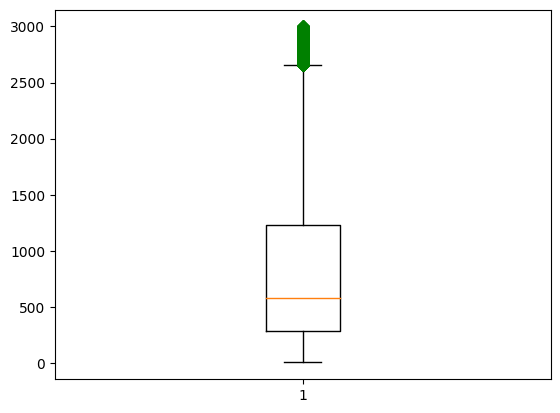

In [13]:
A=df['amount']
plt.boxplot(A,0,'gD')
plt.show()

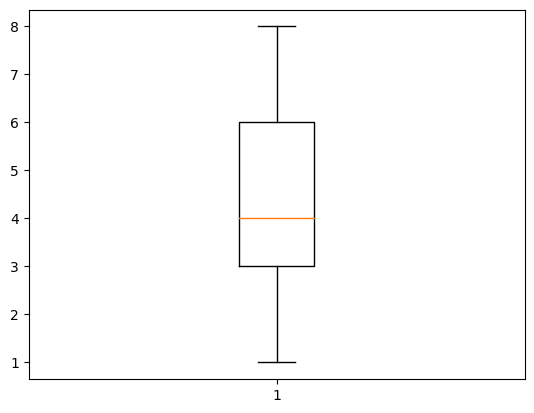

In [14]:
A=df['items']
plt.boxplot(A,0,'gD')
plt.show()

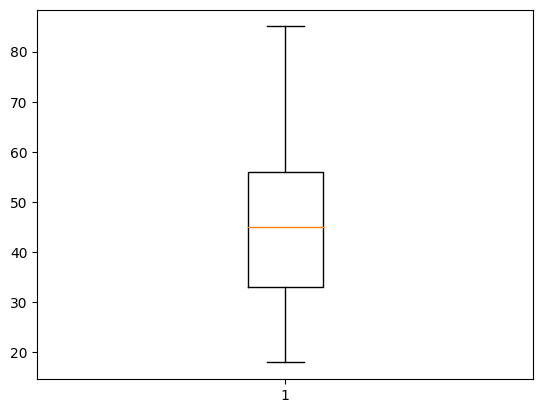

In [15]:
A=df['age']
plt.boxplot(A,0,'gD')
plt.show()

## Data Transformation <a class="anchor" id="Transformation"></a>
* __Renaming in-store columns to Purchase Channel__
* __Converting Purchase Channel to Categorical data type from Numerical data type__
* __Converting Region to Categorical Data Type__

In [16]:
df.rename(columns={'in-store':'Purchase Channel'},inplace='TRUE')

In [17]:
df["Purchase Channel"]=df["Purchase Channel"].values.astype('str')

In [18]:
df["Purchase Channel"].replace(['0','1'],["online","in-store"],inplace=True)

In [19]:
df["region"]=df["region"].values.astype('str')

In [20]:
df["region"].replace(['1','2','3','4'],["North","South","East","West"],inplace=True)

In [21]:
df.dtypes

Purchase Channel     object
age                   int64
items                 int64
amount              float64
region               object
dtype: object

In [22]:
df.head()

,Purchase Channel,age,items,amount,region
0,online,37,4,281.03,South
1,online,35,2,219.51,South
2,in-store,45,3,1525.70,West
3,in-store,46,3,715.25,East
4,in-store,33,4,1937.50,North


In [23]:
df['region'].unique()

array(['South', 'West', 'East', 'North'], dtype=object)

## Data Descretization <a class="anchor" id="descretization"></a>

I discretize the Age and Amount 

In [24]:
# Conversion of Age from numeric data type to categorical using age range
df['Age Range']=pd.cut(x=df.age,bins=[17, 37, 52, 116],labels=['18-37 years', '38-52 years', '>52 years'])

In [25]:
df.head()

,Purchase Channel,age,items,amount,region,Age Range
0,online,37,4,281.03,South,18-37 years
1,online,35,2,219.51,South,18-37 years
2,in-store,45,3,1525.70,West,38-52 years
3,in-store,46,3,715.25,East,38-52 years
4,in-store,33,4,1937.50,North,18-37 years


In [26]:
df.dtypes

Purchase Channel      object
age                    int64
items                  int64
amount               float64
region                object
Age Range           category
dtype: object

## Feature Engineering <a class="anchor" id="Feature"></a>

We created new variabble Age Range to add more meaning to my data

In [27]:
df_modeling=df.copy()

In [28]:
df_modeling['Purchase Channel']=label_encoder.fit_transform(df_modeling['Purchase Channel'])
df_modeling['region']=label_encoder.fit_transform(df_modeling['region'])
df_modeling['Age Range']=label_encoder.fit_transform(df_modeling['Age Range'])

In [29]:
df_modeling.dtypes

Purchase Channel      int32
age                   int64
items                 int64
amount              float64
region                int32
Age Range             int32
dtype: object

In [30]:
df_modeling.head()

,Purchase Channel,age,items,amount,region,Age Range
0,1,37,4,281.03,2,0
1,1,35,2,219.51,2,0
2,0,45,3,1525.70,3,1
3,0,46,3,715.25,0,1
4,0,33,4,1937.50,1,0


# EXPLORATORY DATA ANALYSIS <a class="anchor" id="EDA"></a>


## Univariate Analysis <a class="anchor" id="Univar"></a>

Looking at the Region with respect to the number of transactions carried out,

We observed that the West carried out the highest number of transactions followed by South, East and the North with the least number of transactions.



In [31]:
Sorted=df.sort_values('items', inplace=False)
Sorted.drop_duplicates(subset='amount',inplace=True)
Sorted.head()

,Purchase Channel,age,items,amount,region,Age Range
79999,in-store,30,1,527.120,East,18-37 years
36690,in-store,47,1,584.380,East,38-52 years
36686,online,56,1,1608.300,East,>52 years
19435,in-store,60,1,161.330,North,>52 years
36684,online,63,1,23.013,South,>52 years


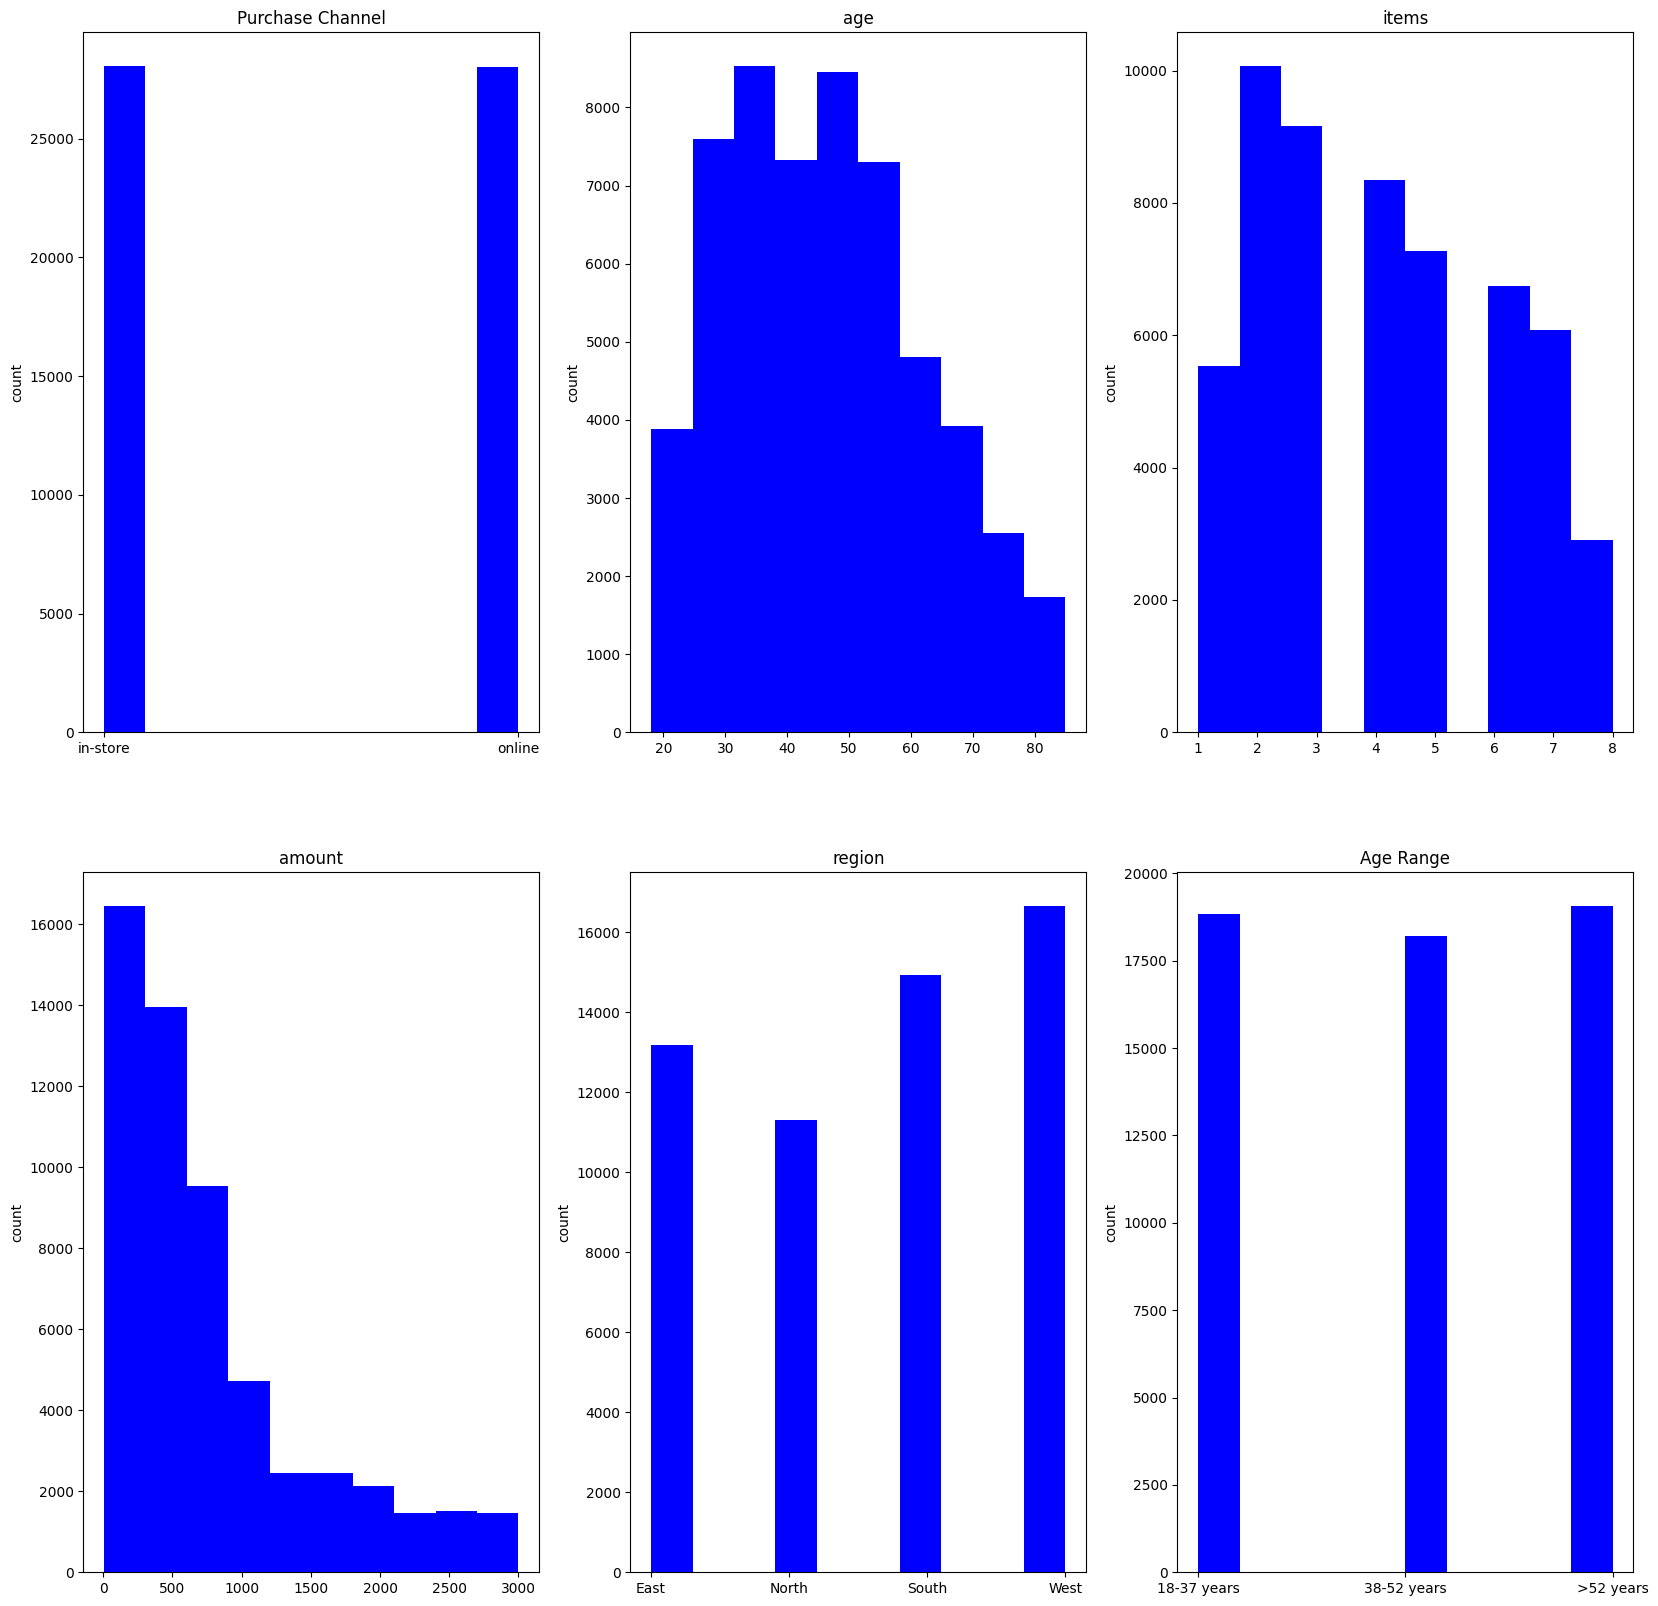

In [32]:
plt.figure(figsize=(20, 20))
for i, j in enumerate(df.columns):
    plt.subplot(2, 3,i+1)
    plt.hist(Sorted[j], color='blue', histtype='bar')
    plt.title(str(df.columns[i]))
    plt.ylabel("count")
        

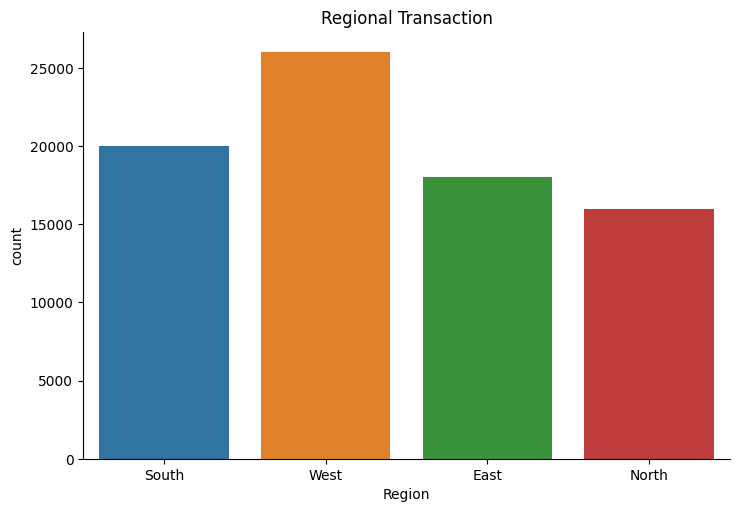

In [33]:
fg = sns.catplot('region', data=df, kind='count', aspect=1.5)
plt.title("Regional Transaction")
fg.set_xlabels('Region')

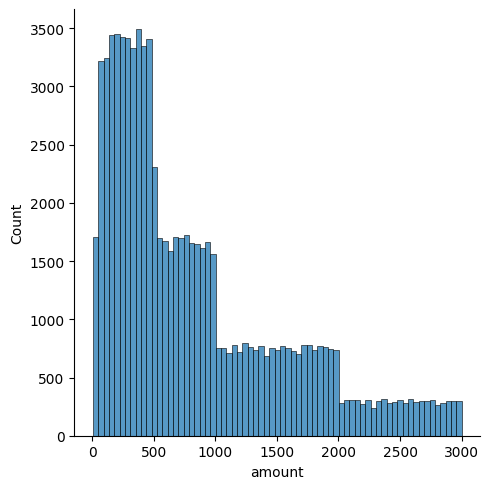

In [34]:
dens=df['amount']

sns.displot(dens)

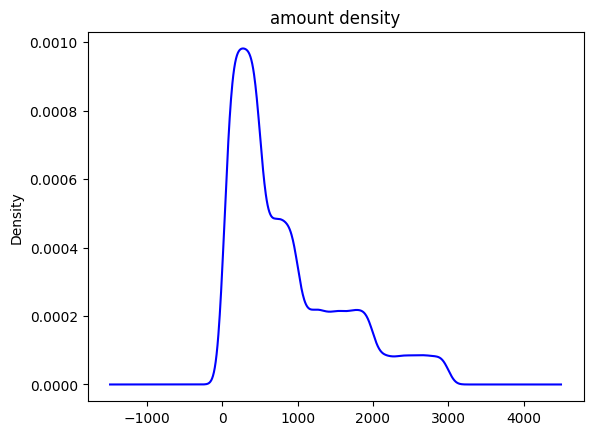

In [35]:
df.amount.plot.density(color='blue')
plt.title('amount density')
plt.show()

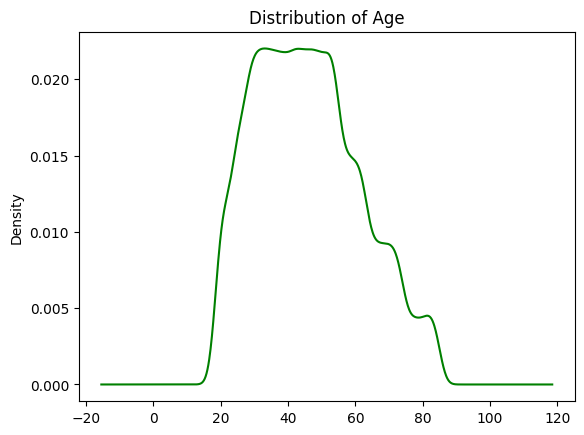

In [36]:
df.age.plot.density(color='green')
plt.title('Distribution of Age')
plt.show()

## Bivariate analysis <a class="anchor" id="Bivar"></a>
Looking at the various relationships that exist between variables.
We can draw relationship between Region and Purchase Mode where we observed that:

* __the North Region did not carry out any online Purchase__
* __the South Region only Purchased online__
* __the West Region has equal amount of in-store and online Purchase__
* __the East Region has a higher in-store Purchase than the online Purchase__ 

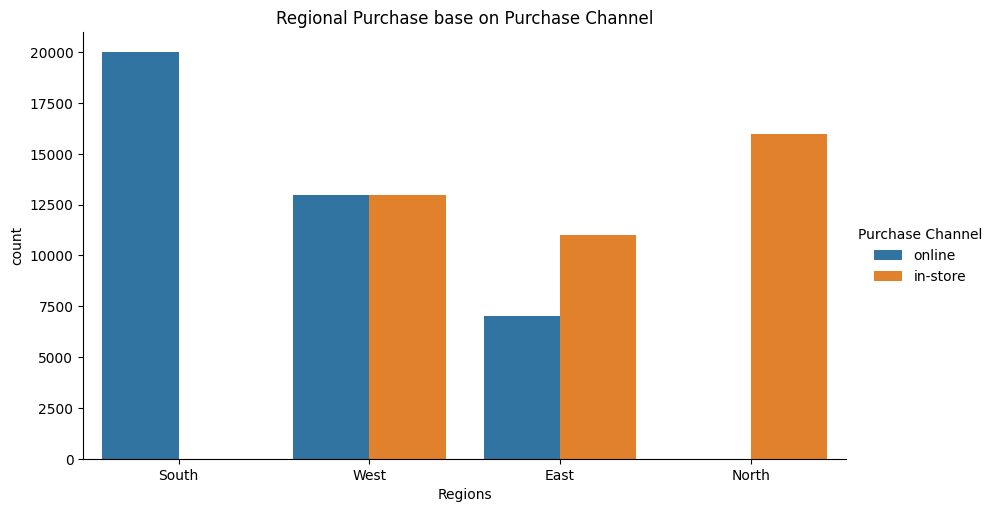

In [37]:
g=sns.catplot('region', data=df, hue='Purchase Channel', kind='count',aspect=1.75)
plt.title("Regional Purchase base on Purchase Channel")
g.set_xlabels('Regions')


Do customers in different regions spend more per transaction?
    
    From the chart below we can understand that the West spend the highest amount for the transactions folowed by the East and North while the South spent the least amount.

In [38]:
regions_amt_df=df.groupby(['region'])['amount'].sum().reset_index(name='Total Amount')

In [39]:
regions_amt_df

,region,Total Amount
0,East,1.652345e+07
1,North,1.191762e+07
2,South,5.040442e+06
3,West,3.336699e+07


Text(0.5, 1.0, 'Regional Purchase base on Total Amount')

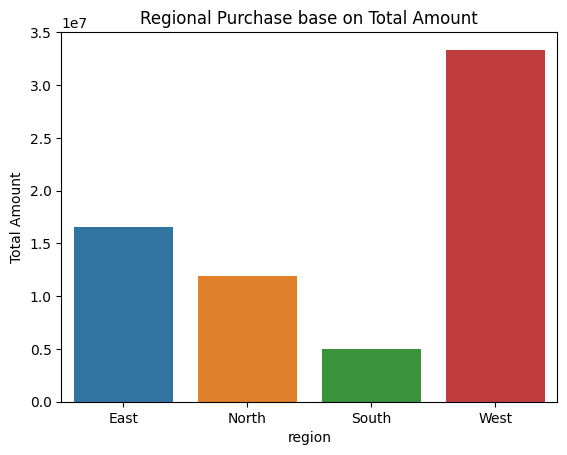

In [40]:
g=sns.barplot(x='region', y='Total Amount', data=regions_amt_df)
plt.title("Regional Purchase base on Total Amount")
#g.set_xlabels('Regions')

Is there a relationship between the number of items purchsed and amount spent?
 
 Items 2 and 8 have the highest Amount of Purchase with less variation to other Items.

In [41]:
items_amt_df=df.groupby(['items'])['amount'].sum().reset_index(name='Total Amount')

In [42]:
items_amt_df

,items,Total Amount
0,1,4.703965e+06
1,2,9.557061e+06
2,3,9.609120e+06
3,4,9.618610e+06
4,5,9.368027e+06
5,6,9.622197e+06
6,7,9.442385e+06
7,8,4.927143e+06


Text(0.5, 1.0, 'Items base on Total Amount')

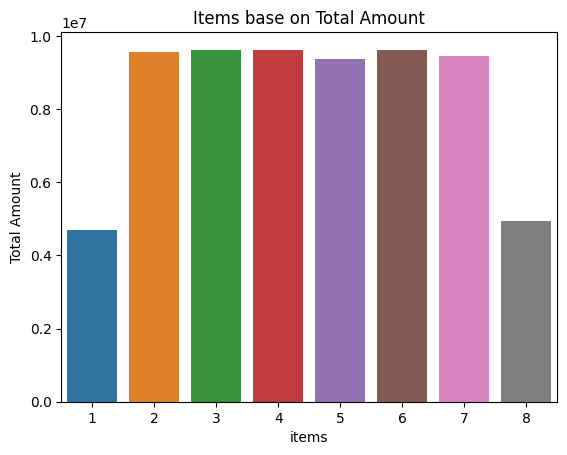

In [43]:
g=sns.barplot(x='items', y='Total Amount', data=items_amt_df)
plt.title("Items base on Total Amount")
#g.set_xlabels('Regions')

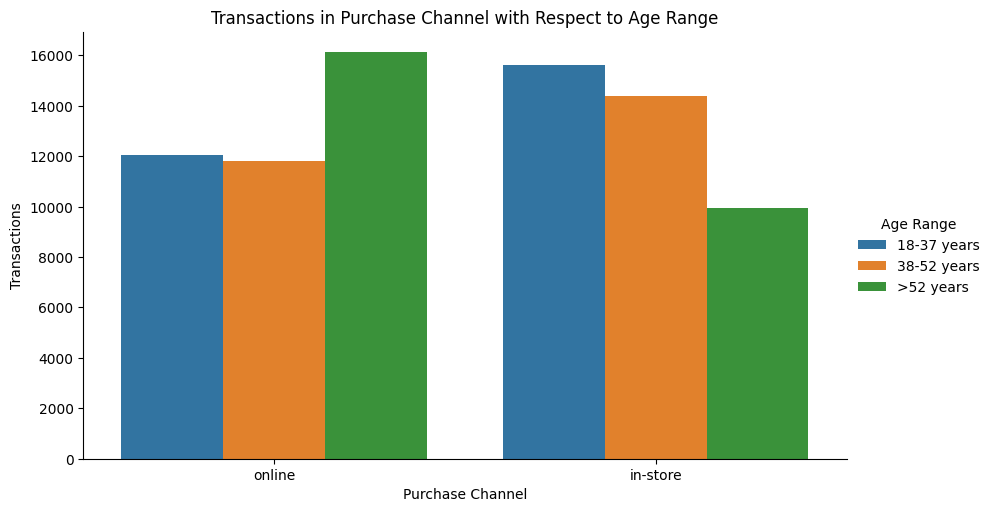

In [44]:
g=sns.catplot('Purchase Channel', data=df, hue='Age Range', kind='count',aspect=1.75)
plt.title("Transactions in Purchase Channel with Respect to Age Range")
g.set_xlabels('Purchase Channel')
g.set_ylabels('Transactions')

# Multivariate Analysis <a class="anchor" id="Multivar"></a>

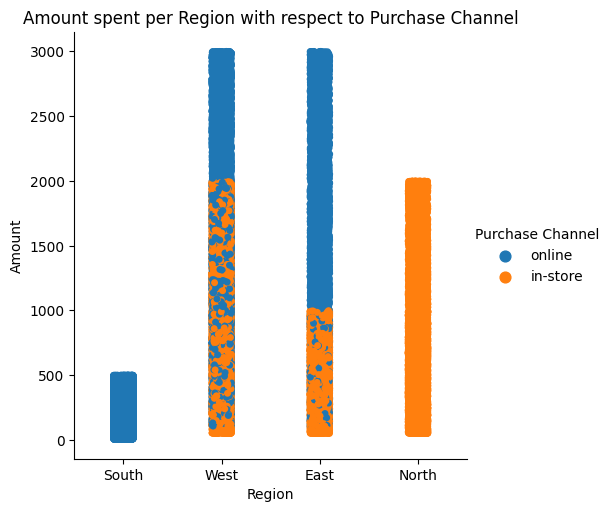

In [45]:
g=sns.catplot(x='region',y='amount', data=df, hue='Purchase Channel', kind='strip')
plt.title("Amount spent per Region with respect to Purchase Channel")
g.set_xlabels('Region')
g.set_ylabels('Amount')

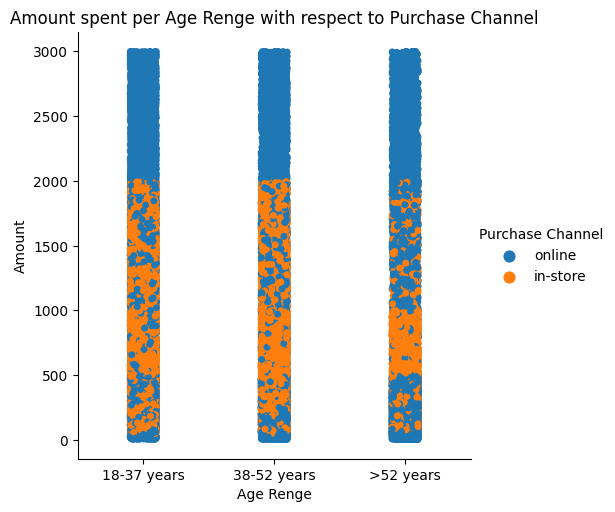

In [46]:
g=sns.catplot(x='Age Range',y='amount', data=df, hue='Purchase Channel', kind='strip')
plt.title("Amount spent per Age Renge with respect to Purchase Channel")
g.set_xlabels('Age Renge')
g.set_ylabels('Amount')

## Features Selection <a class="anchor" id="Features"></a>

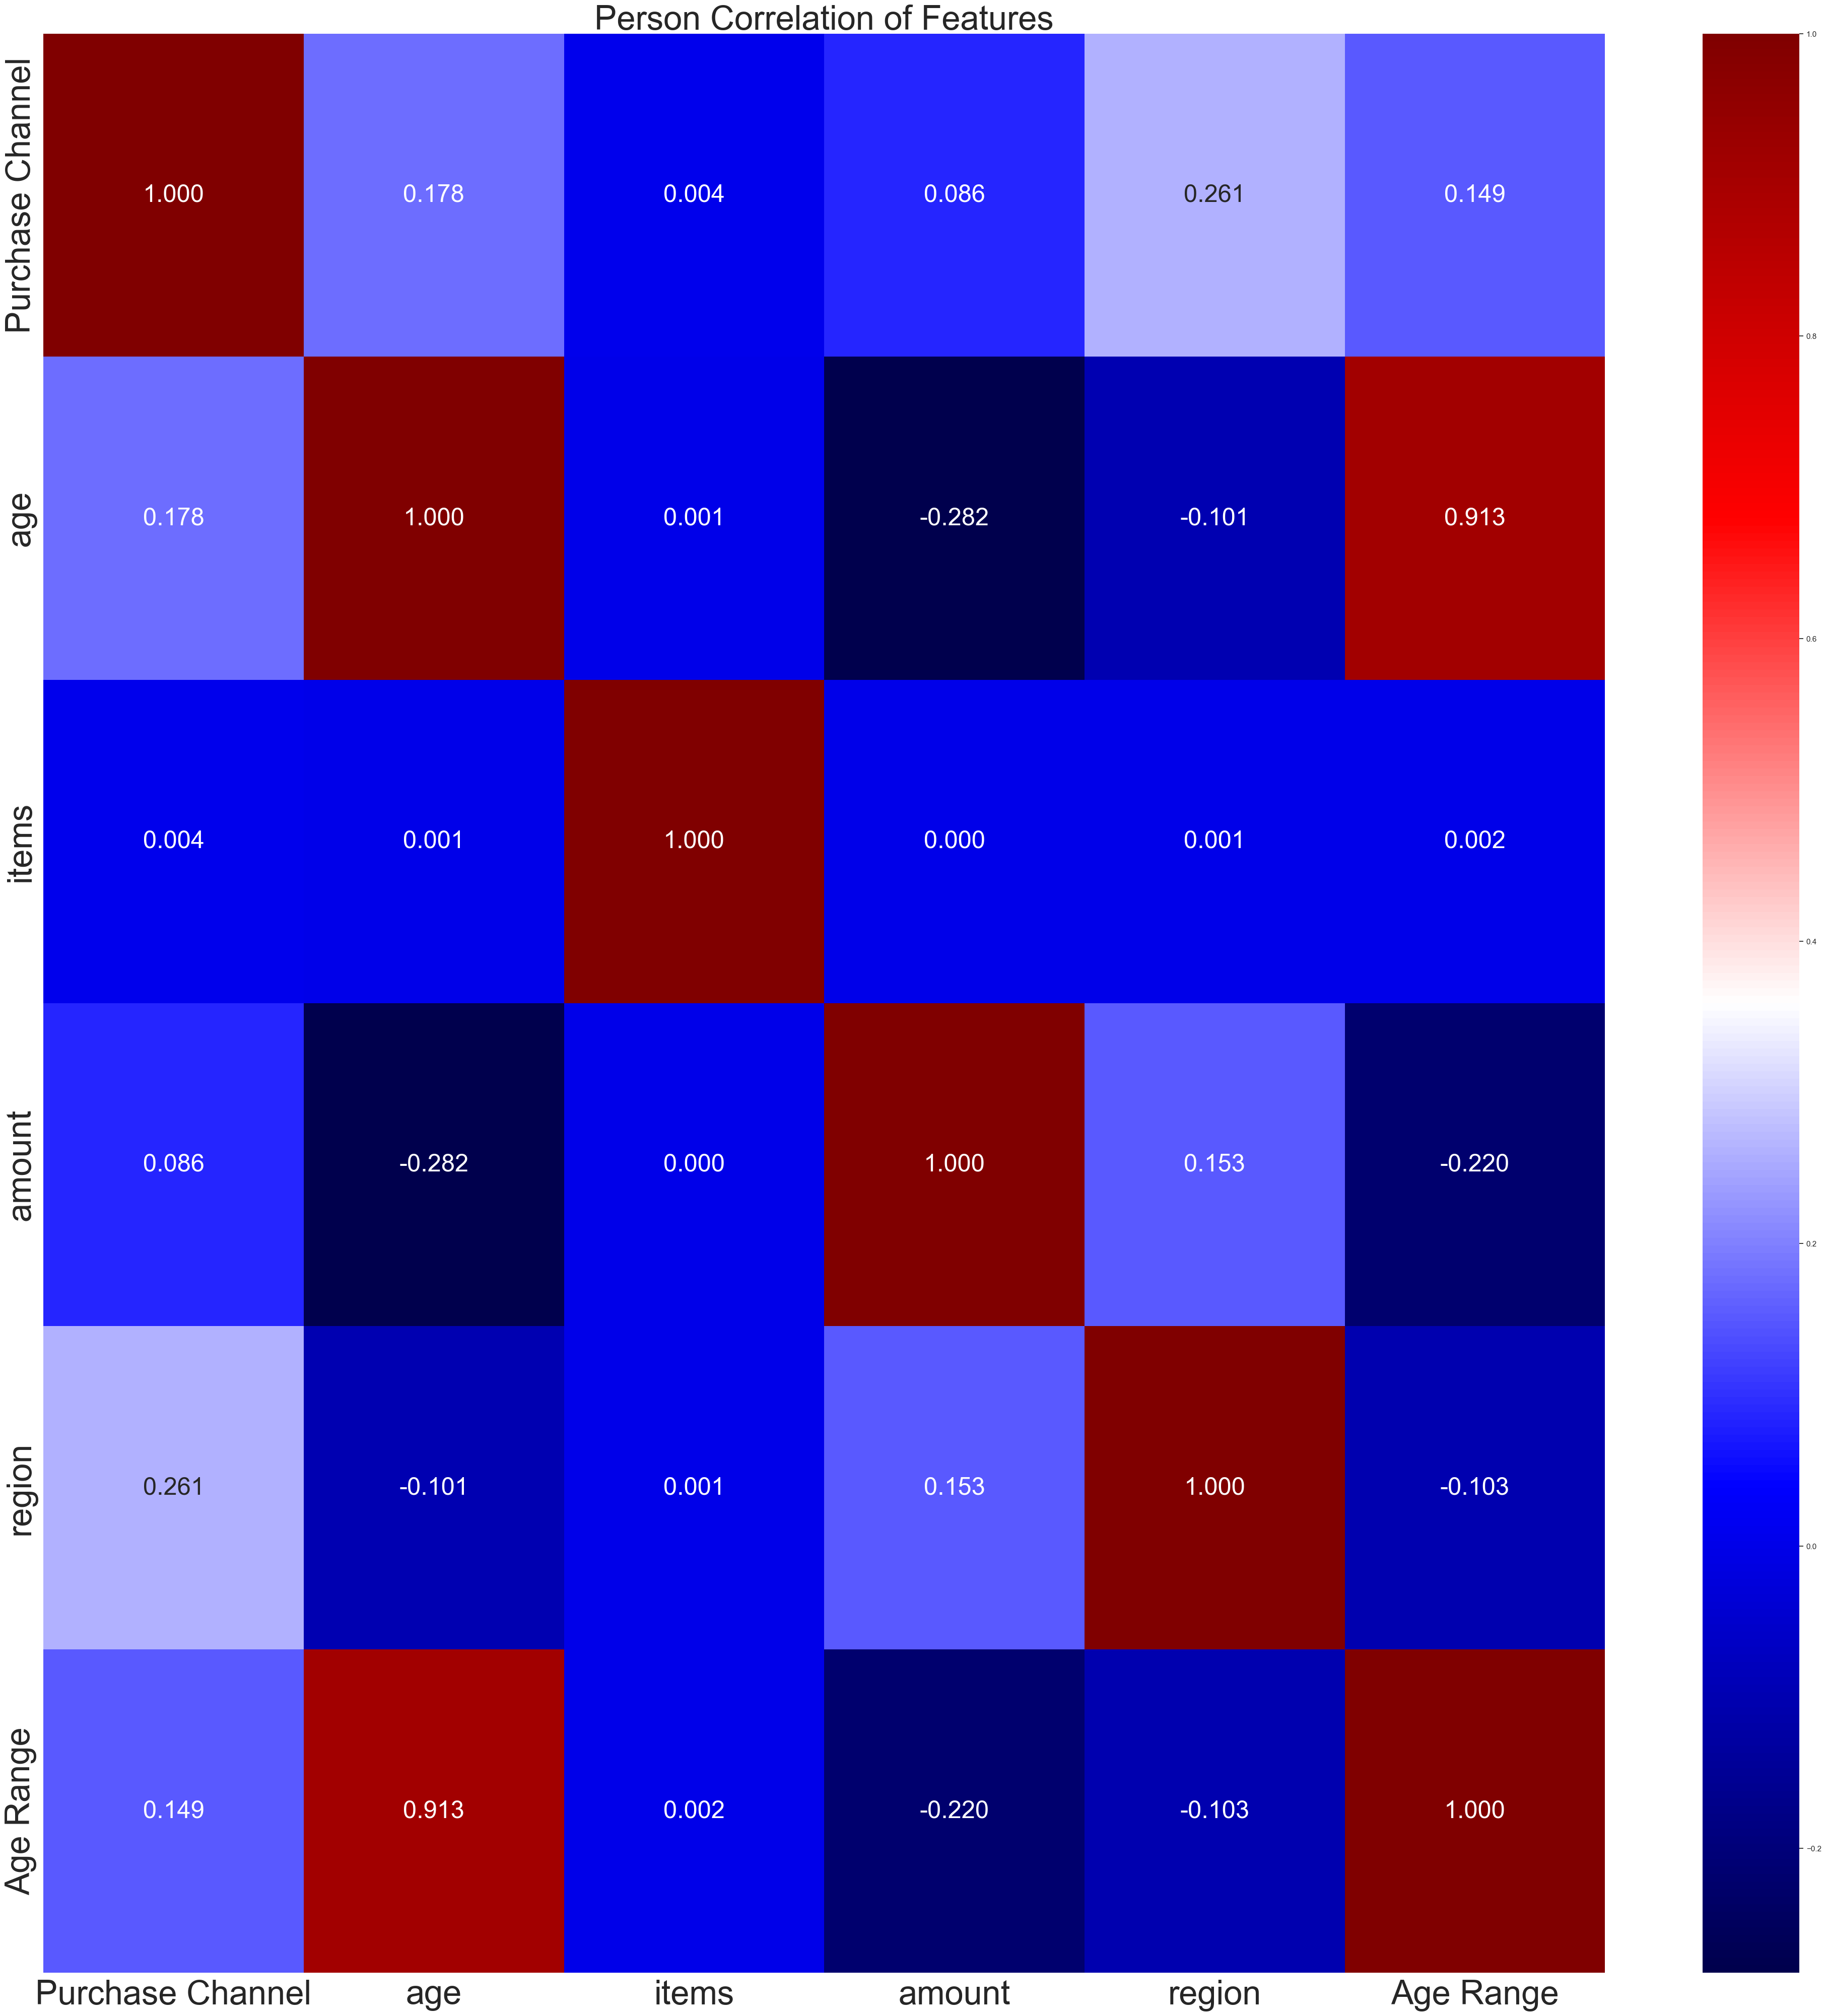

In [47]:
## Visualize the Correlation Mtrix
# Configure x and y axis
CorrMat=df_modeling.corr()
sns.set()
plt.figure(figsize=(50,50))
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Person Correlation of Features', size =48)

# Ploting the data using heatmap
g = sns.heatmap(CorrMat,annot=True,cmap="seismic",annot_kws={"size": 35},fmt=".3f")

# Modelling Using Region as Target<a class="anchor" id="Modelling"></a>

i will do my modelling on region using the following Lgorithms
* ___DecisionTree Classifier____
* ___Random Forest Classifier___
* ___Gradient Boosting Classifier___

## Using DecisionTree Classifier For Region as the Trget <a class="anchor" id="DecisionTree"></a>

I used Purchase Mode, age, items and amount for the Features/Independent variables while the target/Response Variable is region



In [48]:
#Independent variable /Features
x_features = df_modeling[['Purchase Channel', 'age', 'Age Range', 'amount']]
#dependent variable/Target
Region_Target = df_modeling['region']

In [49]:
#Train/Test Split Function
X_features_train, X_features_test, Region_Target_train,Region_Target_test = train_test_split(x_features, Region_Target, test_size = .30, random_state = 123)

In [50]:
# Modeling (Classificaton)
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_features_train,Region_Target_train)

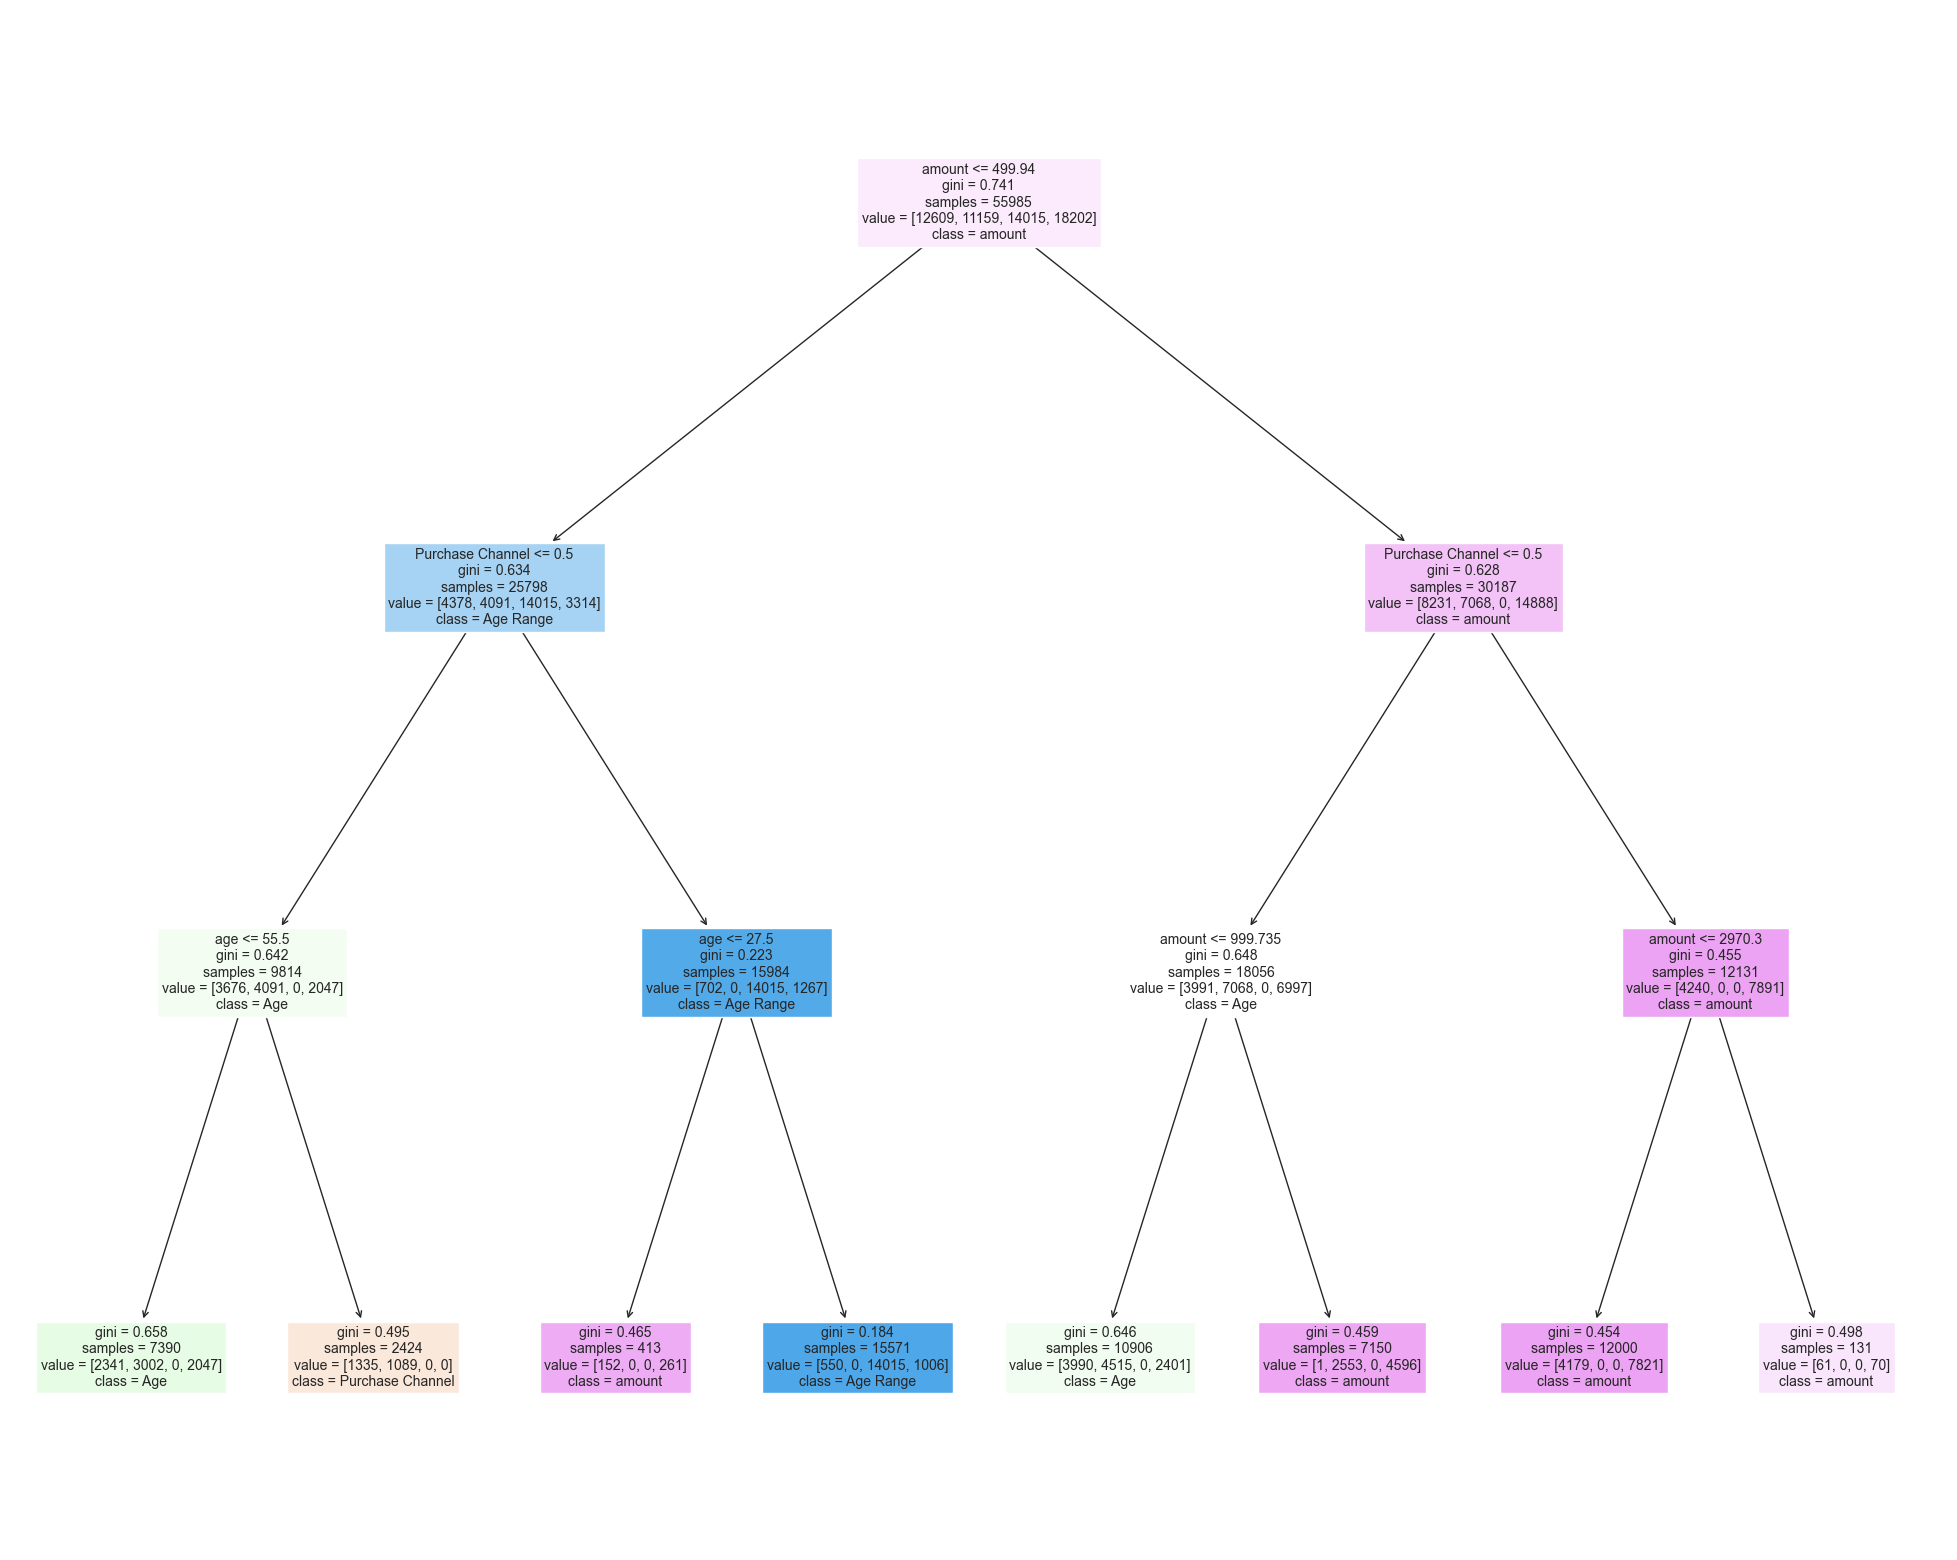

In [51]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=x_features.columns,class_names=['Purchase Channel', 'Age', 'Age Range', 'amount'], filled=True)

# Using Random Forest Classifier For Region as the Target <a class="anchor" id="RandomForest"></a>
I used Purchase Channel, age, items and amount for the features/independent variables while the target/Response Variable is region

In [52]:
# Modeling (Classifier)
algo_RF = RandomForestClassifier()
model_RF = algo_RF.fit(X_features_train,Region_Target_train)

# Using Gradient Boosting Classifier For Region as the Target <a class="anchor" id="GradientBoosting"></a>
I used Purchase Channel, age, items and amount for the features/independent variables while the target/Response Variable is region

In [53]:
# Modeling (Classifier)
algo_GB = GradientBoostingClassifier()
model_GB = algo_GB.fit(X_features_train,Region_Target_train)

## Performance Evaluation <a class="anchor" id="Evaluation"></a>
Here i checked to see the best Model for my Analysis which i found to be the Gradient Boosting Classifier

In [54]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [55]:
#Classification

names = []  # List to store model names
results = []  # List to store the cross-validation results

# Assuming algos_Class is a list of tuples with (model_name, model_instance)
for name, model in algos_Class:
    result = cross_val_score(model, x_features, Region_Target, cv=5, scoring='accuracy')
    
    names.append(name)  # Append the model name to the names list
    results.append(result)  # Append the NumPy array (result) to the results list

# Optional: If you want to convert the NumPy arrays to lists, you can use the following:
# results = [r.tolist() for r in results]  # Converts each NumPy array in the results list to a Python list


In [56]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5675989347446271
Decision Tree Classifier 0.5651232619033157
Gradient Boosting Classifier 0.6438065205579294


## Setting Hyperparameters for GridSearchCV <a class="anchor" id="Hyperparameters"></a>

In [57]:
,# Set hyperparameters of the chosen model. In this case GradientBoostingClassifier
GB_model = GradientBoostingClassifier()# call the model
n_estimators_GB = [50,90,100,130,150] # set n_estmators hyperparameters which perform I want to check
learning_rate_GB = [0.001,0.01,0.1] # Set another hyperparameters, in this case learning_rate

param_grid_GB = dict(learning_rate=learning_rate_GB, n_estimators=n_estimators_GB) # Create a pytho dictionary with the hyperparameters

# Now I will try another function to create the folds of k-fold CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_GB = GridSearchCV(GB_model,
                              param_grid_GB,
                              scoring="accuracy",
                              cv=kfold,
                              n_jobs=-1)

                  

In [58]:
# Time to run all the combinations defined - IT WILL TAKE SOME TIME BE PATIENT
grid_S_G_B = grid_search_GB.fit(X_features_train, Region_Target_train)

In [59]:
# Show the best results
print("Best accuracy: %f using the hyperparameters %s" % (grid_S_G_B.best_score_, grid_S_G_B.best_params_))

Best accuracy: 0.645191 using the hyperparameters {'learning_rate': 0.1, 'n_estimators': 50}


In [60]:
RF_model = RandomForestClassifier()# call the model
n_estimators_RF = [75,100,125,150] # set n_estmators hyperparameters which perform I want to check
max_depth_RF = [2,3,4]
min_samples_split_RF = [3000,6000] 

param_grid_RF = dict(max_depth=max_depth_RF, n_estimators=n_estimators_RF, min_samples_split=min_samples_split_RF) # Create a pytho dictionary with the hyperparameters

# Now I will try another function to create the folds of k-fold CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_RF = GridSearchCV(RF_model,
                              param_grid_RF,
                              scoring="accuracy",
                              cv=kfold,
                              n_jobs=-1)

                  

In [61]:
# Time to run all the combinations defined - IT WILL TAKE SOME TIME BE PATIENT
grid_S_R_F = grid_search_RF.fit(X_features_train, Region_Target_train)

In [62]:
# Show the best results
print("Best accuracy: %f using the hyperparameters %s" % (grid_S_R_F.best_score_, grid_S_R_F.best_params_))

Best accuracy: 0.646048 using the hyperparameters {'max_depth': 4, 'min_samples_split': 3000, 'n_estimators': 75}


In [63]:
DT_model = DecisionTreeClassifier()# call the model
# n_estimators_DT = [75,100,125,150] # set n_estmators hyperparameters which perform I want to check
max_depth_DT = [2,3,4]
min_samples_split_DT = [3000,6000] 

param_grid_DT = dict(max_depth=max_depth_DT, min_samples_split=min_samples_split_DT) # Create a pytho dictionary with the hyperparameters

# Now I will try another function to create the folds of k-fold CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_DT = GridSearchCV(DT_model,
                              param_grid_DT,
                              scoring="accuracy",
                              cv=kfold,
                              n_jobs=-1)

                  

In [64]:
# Time to run all the combinations defined - IT WILL TAKE SOME TIME BE PATIENT
grid_S_D_T = grid_search_DT.fit(X_features_train, Region_Target_train)

In [65]:
# Show the best results
print("Best accuracy: %f using the hyperparameters %s" % (grid_S_D_T.best_score_, grid_S_D_T.best_params_))

Best accuracy: 0.642994 using the hyperparameters {'max_depth': 4, 'min_samples_split': 3000}


## Testing the best Model <a class="anchor" id="Testing"></a>
Having discovered the best classification Algorithm and best Hyperparameters to set for our Model for optimal predictions
I applied the Gradient Boosting Classifier with n_estimator of 50 and learning_rate of 0.1

In [66]:
# I choose a Gradient Boosting Tree setting some hyperparameters
model_algo = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=0)

model =model_algo.fit(X_features_train, Region_Target_train)

In [67]:
# make predictions
predit = model.predict(X_features_test)
# evalue preditions
acc = accuracy_score(Region_Target_test, predit)
print('Accuracy: %.3f' % acc)

Accuracy: 0.643


In [68]:
print(classification_report(Region_Target_test, predit, target_names= ['North', 'South', 'East', 'West']))

              precision    recall  f1-score   support

       North       0.53      0.22      0.31      5391
       South       0.40      0.53      0.46      4838
        East       0.90      1.00      0.95      5979
        West       0.65      0.73      0.69      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.64      0.64      0.62     23994



Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting Classifier')

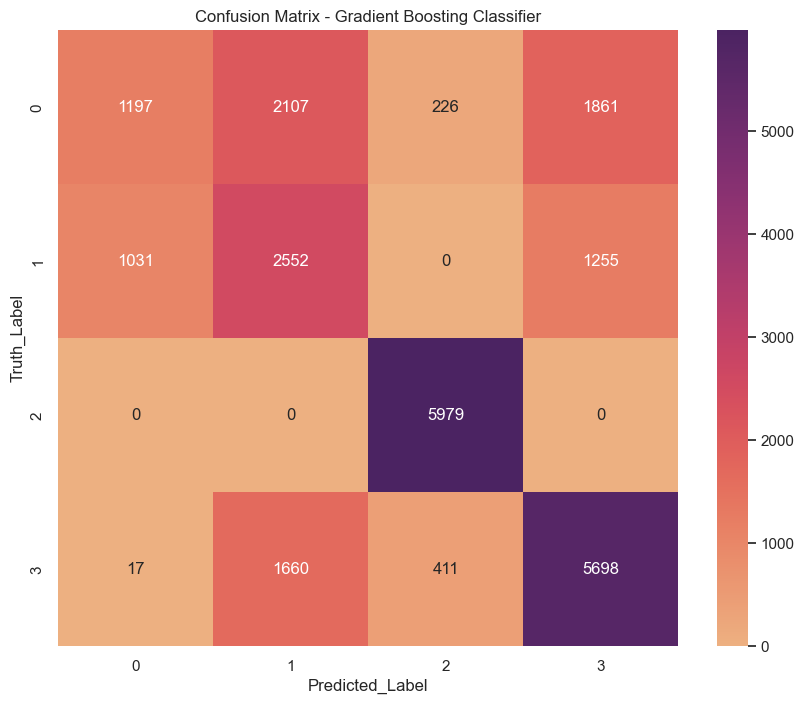

In [69]:
cm = confusion_matrix(Region_Target_test, predit)
cm
# after creating the confusion matrix for better bunderstanding plot the cm
plt.figure(figsize = (10,8))
# Were 'cmap' is used to set the accent colour
sns.heatmap(cm, annot=True, cmap= 'flare', fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
            

Findings: From the confusion matrix above, I observed that the model was not able to predict correctly at each point which might be as a result of the datatype used for the categorical variables eg. region and Purchase Channel which have numerical values. It might also be as a result of discretization.

# Modelling using Age Range as Target <a class="anchor" id="Age"></a>

I will do my modelling on Age Range using the following Algorithms
* __DecisionTree Classifier__
* __Random Forest Classifier__
* __Gradient Boosting Classifier__


## Using DecisionTree Classifier For Age Range as the Trget <a class="anchor" id="DecisionTree1"></a>
I used Purchase Channel, items, Region and Amount for the features/independent variables while the target/Response Variable is Age Range

In [70]:
df_modeling

,Purchase Channel,age,items,amount,region,Age Range
0,1,37,4,281.03,2,0
1,1,35,2,219.51,2,0
2,0,45,3,1525.70,3,1
3,0,46,3,715.25,0,1
4,0,33,4,1937.50,1,0
...,...,...,...,...,...,...
79995,0,71,3,558.82,1,2
79996,1,59,7,1932.00,0,2
79997,1,54,1,414.16,2,2
79998,0,49,4,335.32,1,1


In [71]:
#Independent variable /Features
y_features = df_modeling[['Purchase Channel', 'items', 'region', 'amount']]
#dependent variable/Target
Age_Range_Target = df_modeling['Age Range']

In [72]:
#Train/Test Split Function
Age_Range_features_train, Age_Range_features_test, Age_Range_Target_train,Age_Range_Target_test = train_test_split(x_features, Age_Range_Target, test_size = .30, random_state = 123)

In [73]:
# Modeling (Classificaton)
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(Age_Range_features_train,Age_Range_Target_train)

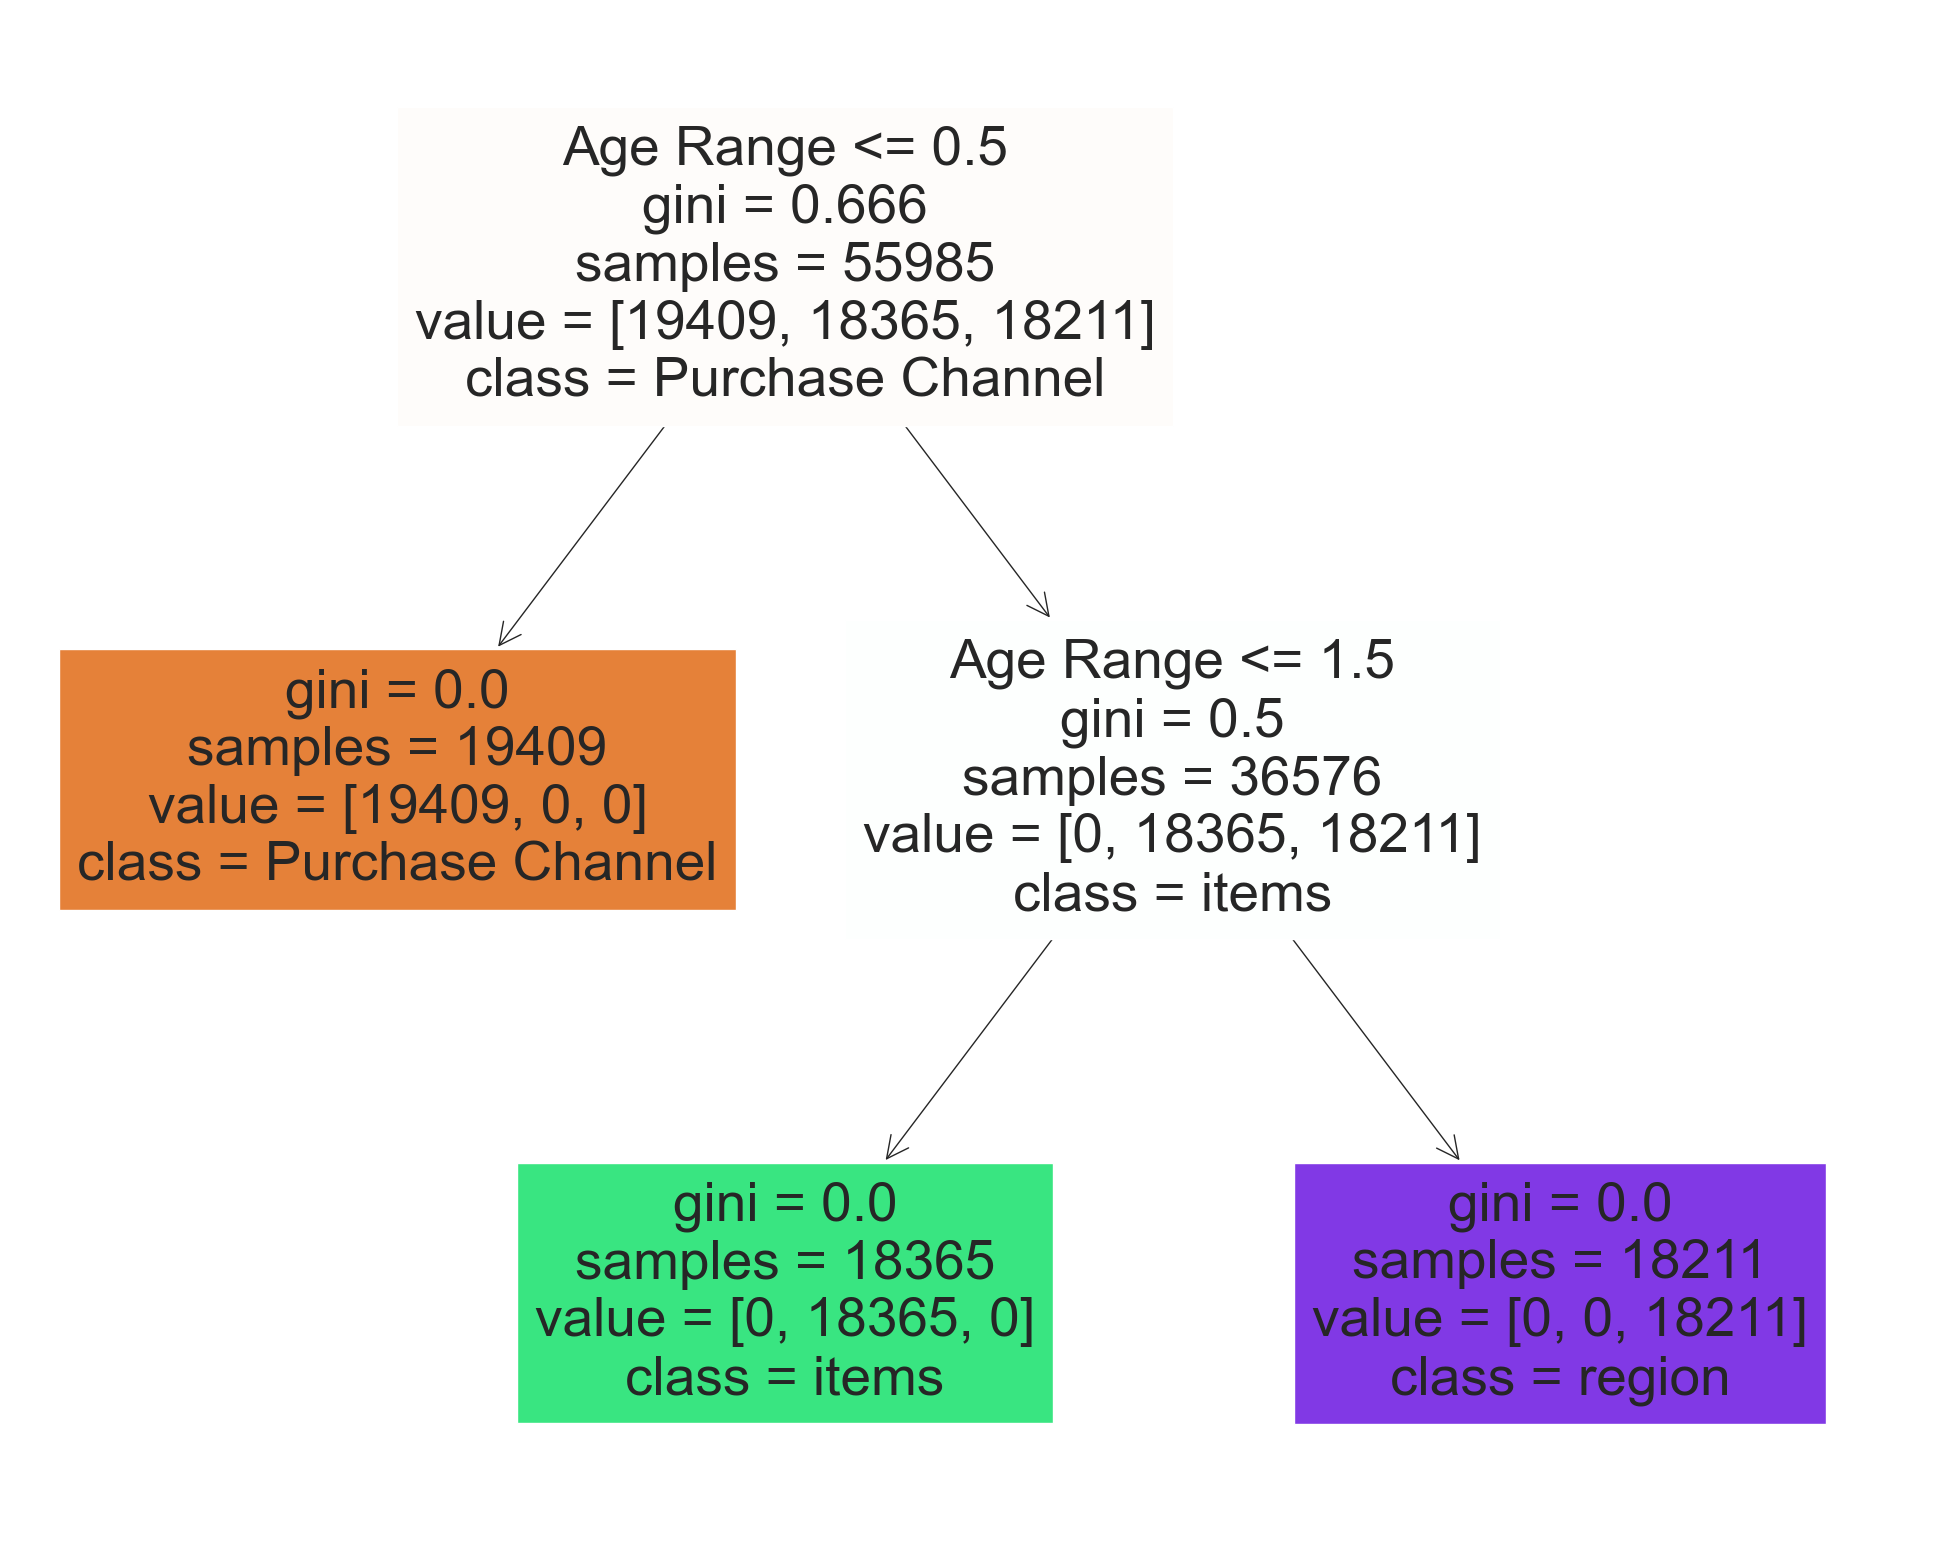

In [74]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=x_features.columns,class_names=['Purchase Channel', 'items', 'region', 'amount'], filled=True)

## Using Random Forest Classifier For Region as the Target <a class="anchor" id="RandomForest2"></a>
I used Purchase Channel, items, region, and amount for the features/independent variables while the target/Response Variable is Age Range

In [75]:
# Modeling (Classifier)
algo_RF = RandomForestClassifier()
model_RF = algo_RF.fit(Age_Range_features_train,Age_Range_Target_train)

## Using Gradient Boosting Classifier For Region as the Target <a class="anchor" id="GradientBoosting"></a>
I used Purchase Channel, items, region, and amount for the features/independent variables while the target/Response Variable is Age_Range

In [76]:
# Modeling (Classifier)
algo_GB = GradientBoostingClassifier()
model_GB = algo_GB.fit(Age_Range_features_train,Age_Range_Target_train)

## Performance Evaluation <a class="anchor" id="Performance"></a>
Here i checked to see the best Model for my Analysis which i found to be the Gradient Boosting Classifier

In [77]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [78]:
#Classification

names = []  # List to store model names
results = []  # List to store the cross-validation results

# Assuming algos_Class is a list of tuples with (model_name, model_instance)
for name, model in algos_Class:
    result = cross_val_score(model, y_features, Age_Range_Target, cv=5, scoring='accuracy')
    
    names.append(name)  # Append the model name to the names list
    results.append(result)  # Append the NumPy array (result) to the results list

# Optional: If you want to convert the NumPy arrays to lists, you can use the following:
# results = [r.tolist() for r in results]  # Converts each NumPy array in the results list to a Python list


In [79]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.3858012924612835
Decision Tree Classifier 0.3857387690154799
Gradient Boosting Classifier 0.46851048413869645


## Setting Hyperparameters for GridSearchCV <a class="anchor" id="Setting"></a>

In [80]:
,# Set hyperparameters of the chosen model. In this case GradientBoostingClassifier
GB_model = GradientBoostingClassifier()# call the model
n_estimators_GB = [50,90,100,130,150] # set n_estmators hyperparameters which perform I want to check
learning_rate_GB = [0.001,0.01,0.1] # Set another hyperparameters, in this case learning_rate

param_grid_GB = dict(learning_rate=learning_rate_GB, n_estimators=n_estimators_GB) # Create a pytho dictionary with the hyperparameters

# Now I will try another function to create the folds of k-fold CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_GB = GridSearchCV(GB_model,
                              param_grid_GB,
                              scoring="accuracy",
                              cv=kfold,
                              n_jobs=-1)

                  

In [81]:
# Time to run all the combinations defined - IT WILL TAKE SOME TIME BE PATIENT
grid_S_G_B = grid_search_GB.fit(Age_Range_features_train, Age_Range_Target_train)

In [82]:
# Show the best results
print("Best accuracy: %f using the hyperparameters %s" % (grid_S_G_B.best_score_, grid_S_G_B.best_params_))

Best accuracy: 1.000000 using the hyperparameters {'learning_rate': 0.001, 'n_estimators': 50}


In [83]:
RF_model = RandomForestClassifier()# call the model
n_estimators_RF = [75,100,125,150] # set n_estmators hyperparameters which perform I want to check
max_depth_RF = [2,3,4]
min_samples_split_RF = [3000,6000] 

param_grid_RF = dict(max_depth=max_depth_RF, n_estimators=n_estimators_RF, min_samples_split=min_samples_split_RF) # Create a pytho dictionary with the hyperparameters

# Now I will try another function to create the folds of k-fold CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_RF = GridSearchCV(RF_model,
                              param_grid_RF,
                              scoring="accuracy",
                              cv=kfold,
                              n_jobs=-1)

                  

In [84]:
# Time to run all the combinations defined - IT WILL TAKE SOME TIME BE PATIENT
grid_S_R_F = grid_search_RF.fit(Age_Range_features_train, Age_Range_Target_train)

In [85]:
# Show the best results
print("Best accuracy: %f using the hyperparameters %s" % (grid_S_R_F.best_score_, grid_S_R_F.best_params_))

Best accuracy: 1.000000 using the hyperparameters {'max_depth': 2, 'min_samples_split': 3000, 'n_estimators': 75}


In [86]:
DT_model = DecisionTreeClassifier()# call the model
# n_estimators_DT = [75,100,125,150] # set n_estmators hyperparameters which perform I want to check
max_depth_DT = [2,3,4]
min_samples_split_DT = [3000,6000] 

param_grid_DT = dict(max_depth=max_depth_DT, min_samples_split=min_samples_split_DT) # Create a pytho dictionary with the hyperparameters

# Now I will try another function to create the folds of k-fold CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_DT = GridSearchCV(DT_model,
                              param_grid_DT,
                              scoring="accuracy",
                              cv=kfold,
                              n_jobs=-1)

                  

In [87]:
# Time to run all the combinations defined - IT WILL TAKE SOME TIME BE PATIENT
grid_S_D_T = grid_search_DT.fit(Age_Range_features_train, Age_Range_Target_train)

In [88]:
# Show the best results
print("Best accuracy: %f using the hyperparameters %s" % (grid_S_D_T.best_score_, grid_S_D_T.best_params_))

Best accuracy: 1.000000 using the hyperparameters {'max_depth': 2, 'min_samples_split': 3000}


## Testing the best Model <a class="anchor" id="best"></a>
Having discovered the best classification Algorithm and best Hyperparameters to set for our Model for optimal predictions
I applied the Decision Tree Classifier with max_depth of 2 and min_sample_split :3000

In [89]:
# I choose a Gradient Boosting Tree setting some hyperparameters
model_algo = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001, max_depth=3, random_state=0)

model =model_algo.fit(Age_Range_features_train, Age_Range_Target_train)

In [90]:
# make predictions
predit = model.predict(Age_Range_features_test)
# evalue preditions
acc = accuracy_score(Age_Range_Target_test, predit)
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


In [91]:
print(classification_report(Age_Range_Target_test, predit, target_names= ['18-37 years', '38-52 years', '>52 years']))

              precision    recall  f1-score   support

 18-37 years       1.00      1.00      1.00      8270
 38-52 years       1.00      1.00      1.00      7864
   >52 years       1.00      1.00      1.00      7860

    accuracy                           1.00     23994
   macro avg       1.00      1.00      1.00     23994
weighted avg       1.00      1.00      1.00     23994



Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting Classifier')

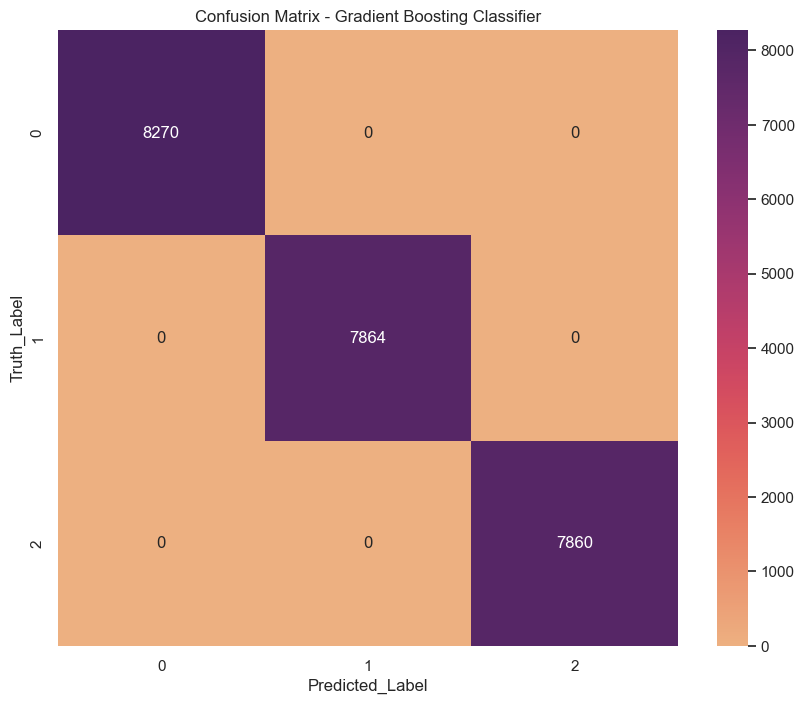

In [92]:
cm = confusion_matrix(Age_Range_Target_test, predit)
cm
# after creating the confusion matrix for better bunderstanding plot the cm
plt.figure(figsize = (10,8))
# Were 'cmap' is used to set the accent colour
sns.heatmap(cm, annot=True, cmap= 'flare', fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
            

# Conclusions <a class="anchor" id="Conclusions"></a>
* Do customers in different regions spend more per transaction? Which regions spend the most/least?
I can actually show that customers in different Regions spend more per transaction with West region spending the most and South Region spending the least








## Counts

In [93]:
df.head

<bound method NDFrame.head of       Purchase Channel  age  items   amount region    Age Range
0               online   37      4   281.03  South  18-37 years
1               online   35      2   219.51  South  18-37 years
2             in-store   45      3  1525.70   West  38-52 years
3             in-store   46      3   715.25   East  38-52 years
4             in-store   33      4  1937.50  North  18-37 years
...                ...  ...    ...      ...    ...          ...
79995         in-store   71      3   558.82  North    >52 years
79996           online   59      7  1932.00   East    >52 years
79997           online   54      1   414.16  South    >52 years
79998         in-store   49      4   335.32  North  38-52 years
79999         in-store   30      1   527.12   East  18-37 years

[79979 rows x 6 columns]>

In [94]:
# Assuming 'df' is your DataFrame
count = df['region'].value_counts()  # Getting the counts for 'Purchase Channel'

print(f"Counts for region:\n{count}\n")


Counts for region:
West     25988
South    19994
East     18000
North    15997
Name: region, dtype: int64



In [95]:
df.groupby('amount').max()

,Purchase Channel,age,items,region,Age Range
amount,,,,,
5.0047,online,60,6,South,>52 years
5.0604,online,76,2,South,>52 years
5.0660,online,53,3,South,>52 years
5.1175,online,32,6,South,18-37 years
5.1583,online,59,6,South,>52 years
...,...,...,...,...,...
2999.4000,online,62,6,East,>52 years
2999.6000,online,57,6,West,>52 years
2999.7000,online,60,3,West,>52 years


In [96]:
# Assuming 'df' is your DataFrame
count = df['Purchase Channel'].value_counts()  # Getting the counts for 'Purchase Channel'

print(f"Counts for Purchase Channel:\n{count}\n")


Counts for Purchase Channel:
in-store    39990
online      39989
Name: Purchase Channel, dtype: int64



In [97]:
# Assuming 'df' is your DataFrame
count = df['age'].value_counts()  # Getting the counts for 'Purchase Channel'

print(f"Counts for age:\n{count}\n")


Counts for age:
53    1829
32    1788
42    1784
36    1784
34    1783
      ... 
75     334
76     327
79     320
18     223
85     185
Name: age, Length: 68, dtype: int64



In [98]:
# Assuming 'df' is your DataFrame
count = df['Age Range'].value_counts()  # Getting the counts for 'Purchase Channel'

print(f"Counts for Age Range:\n{count}\n")


Counts for Age Range:
18-37 years    27679
38-52 years    26229
>52 years      26071
Name: Age Range, dtype: int64



In [99]:
# Assuming 'df' is your DataFrame
count = df['items'].value_counts()  # Getting the counts for 'Purchase Channel'

print(f"Counts for items:\n{count}\n")


Counts for items:
4    11594
6    11519
3    11486
7    11376
2    11284
5    11233
8     5788
1     5699
Name: items, dtype: int64



In [100]:
# Assuming 'df' is your DataFrame
count = df['amount'].value_counts()  # Getting the counts for 'Purchase Channel'

print(f"Counts for amount:\n{count}\n")


Counts for amount:
1914.00    9
1487.40    8
1073.50    8
1129.50    8
1375.70    7
          ..
183.53     1
988.51     1
597.46     1
687.95     1
527.12     1
Name: amount, Length: 56112, dtype: int64

